In [1]:
from matplotlib.image import imread
import PIL
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams.update({'font.size': 18})
A = imread('Images/Lena.png')
B = np.mean(A, -1);
print(B)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.72745097 0.72450984 0.7117647  ... 0.7343137  0.74215686 0.7441176 ]
 [0.72745097 0.72450984 0.7117647  ... 0.7343137  0.74215686 0.7441176 ]
 ...
 [0.4166667  0.43627453 0.4343137  ... 0.50392157 0.51274514 0.5323529 ]
 [0.42941177 0.43333334 0.42745098 ... 0.5088235  0.5333333  0.54509807]
 [0.41862744 0.43627453 0.41862744 ... 0.5117647  0.54019606 0.55784315]]


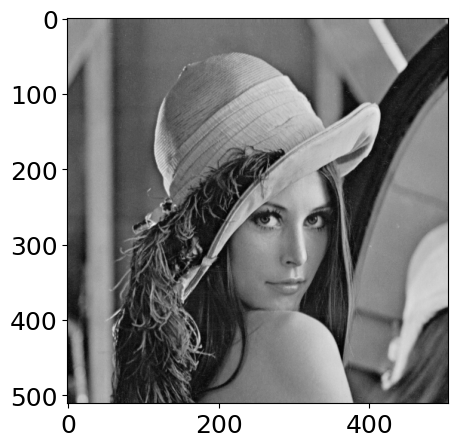

In [4]:
import cv2
lena = cv2.imread('Images/Lena.png',0)
plt.imshow(lena,cmap='gray')
plt.show()

In [5]:
Bt = np.fft.fft2(B)
print(Bt.shape)
Btsort = np.sort(np.abs(Bt.reshape(-1)))
print(Bt.reshape(-1).shape)

(511, 505)
(258055,)


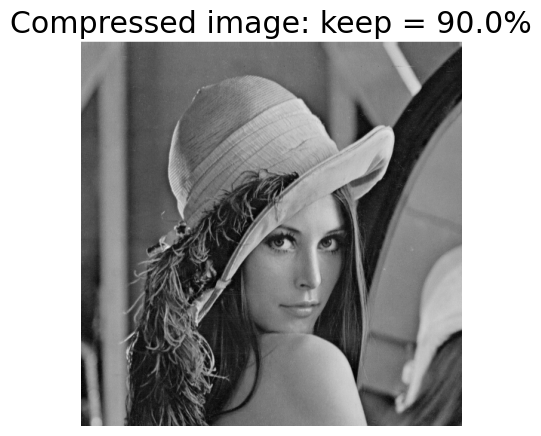

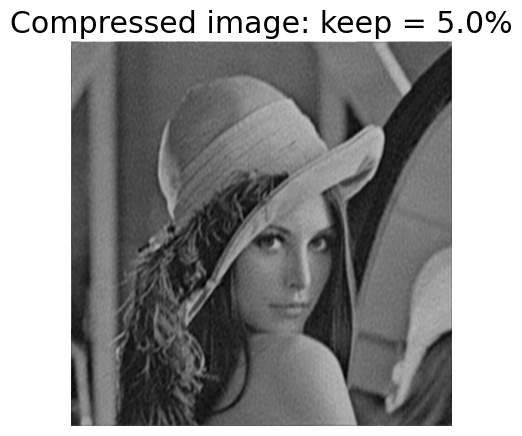

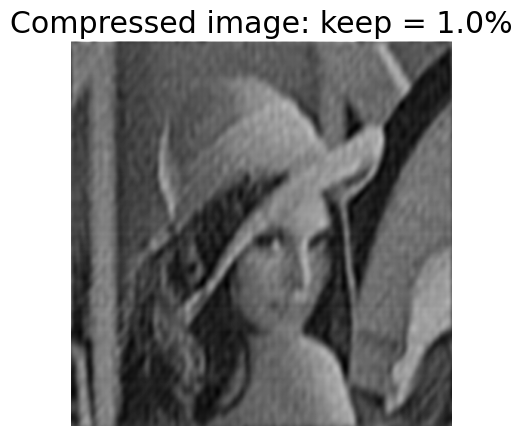

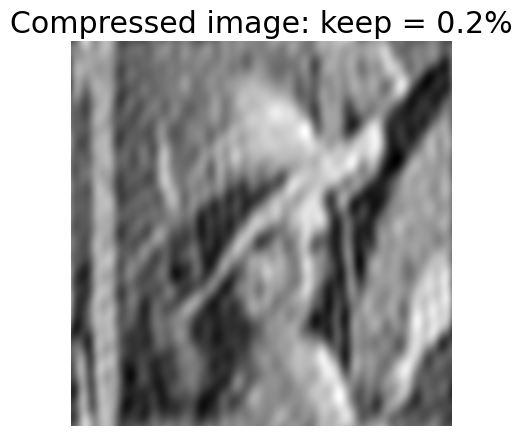

In [6]:
for keep in (0.9, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh
    Atlow = Bt * ind
    Alow = np.fft.ifft2(Atlow).real
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep*100)+'%')